<a href="https://colab.research.google.com/github/Ankit2759/ImageProcessing/blob/main/edgedetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

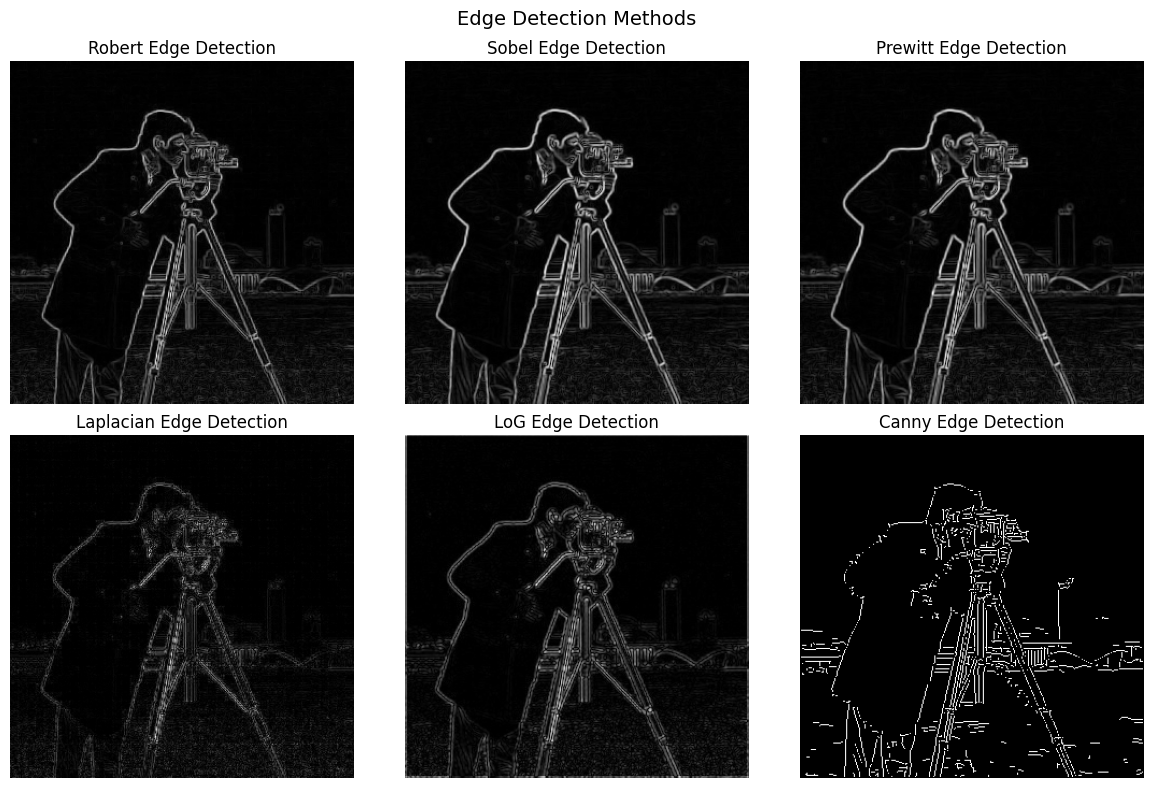

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter

# Read image and convert to grayscale
A = cv2.imread("/content/cameraman.jpg", cv2.IMREAD_GRAYSCALE)
I = A.astype(float) / 255.0

plt.figure(figsize=(12, 8))

# =========================
# 1️⃣ Robert Edge Detection
# =========================
Mx = np.array([[1, 0], [0, -1]])
My = np.array([[0, 1], [-1, 0]])

Gx = convolve2d(I, Mx, mode='same', boundary='symm')
Gy = convolve2d(I, My, mode='same', boundary='symm')
Edge_Robert = np.sqrt(Gx**2 + Gy**2)
Edge_Robert = (Edge_Robert - Edge_Robert.min()) / (Edge_Robert.max() - Edge_Robert.min())

plt.subplot(2, 3, 1)
plt.imshow(Edge_Robert, cmap='gray')
plt.title("Robert Edge Detection")
plt.axis('off')

# =========================
# 2️⃣ Sobel Edge Detection
# =========================
Mx = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
My = Mx.T

Gx = convolve2d(I, Mx, mode='same', boundary='symm')
Gy = convolve2d(I, My, mode='same', boundary='symm')
Edge_Sobel = np.sqrt(Gx**2 + Gy**2)
Edge_Sobel = (Edge_Sobel - Edge_Sobel.min()) / (Edge_Sobel.max() - Edge_Sobel.min())

plt.subplot(2, 3, 2)
plt.imshow(Edge_Sobel, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

# =========================
# 3️⃣ Prewitt Edge Detection
# =========================
Mx = np.array([[1, 0, -1],
               [1, 0, -1],
               [1, 0, -1]])
My = Mx.T

Gx = convolve2d(I, Mx, mode='same', boundary='symm')
Gy = convolve2d(I, My, mode='same', boundary='symm')
Edge_Prewitt = np.sqrt(Gx**2 + Gy**2)
Edge_Prewitt = (Edge_Prewitt - Edge_Prewitt.min()) / (Edge_Prewitt.max() - Edge_Prewitt.min())

plt.subplot(2, 3, 3)
plt.imshow(Edge_Prewitt, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis('off')

# =========================
# 4️⃣ Laplacian Edge Detection
# =========================
Mx = np.array([[0, -1, 0],
               [-1, 4, -1],
               [0, -1, 0]])
My = Mx.T

Gx = convolve2d(I, Mx, mode='same', boundary='symm')
Gy = convolve2d(I, My, mode='same', boundary='symm')
Edge_Laplacian = np.sqrt(Gx**2 + Gy**2)
Edge_Laplacian = (Edge_Laplacian - Edge_Laplacian.min()) / (Edge_Laplacian.max() - Edge_Laplacian.min())

plt.subplot(2, 3, 4)
plt.imshow(Edge_Laplacian, cmap='gray')
plt.title("Laplacian Edge Detection")
plt.axis('off')

# =========================
# 5️⃣ Laplacian of Gaussian (LoG)
# =========================
# Define Laplacian mask
L = np.array([[0, 1, 0],
              [1, -4, 1],
              [0, 1, 0]])
# Define Gaussian mask
G = (1/16) * np.array([[1, 2, 1],
                       [2, 4, 2],
                       [1, 2, 1]])

LoG = convolve2d(L, G, mode='full')
Edge_LoG = convolve2d(I, LoG, mode='same')
Edge_LoG = np.abs(Edge_LoG)
Edge_LoG = (Edge_LoG - Edge_LoG.min()) / (Edge_LoG.max() - Edge_LoG.min())

plt.subplot(2, 3, 5)
plt.imshow(Edge_LoG, cmap='gray')
plt.title("LoG Edge Detection")
plt.axis('off')

# =========================
# 6️⃣ Canny Edge Detection (Manual)
# =========================
# Step 1: Gaussian smoothing
sigma = 1
I_smooth = gaussian_filter(I, sigma=sigma)

# Step 2: Gradient (Sobel)
Sx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])
Sy = Sx.T
Ix = convolve2d(I_smooth, Sx, mode='same')
Iy = convolve2d(I_smooth, Sy, mode='same')

Mag = np.sqrt(Ix**2 + Iy**2)
Theta = np.arctan2(Iy, Ix)

# Step 3: Non-Maximum Suppression
rows, cols = Mag.shape
NMS = np.zeros_like(Mag)
Theta_deg = np.rad2deg(Theta)
Theta_deg[Theta_deg < 0] += 180

for i in range(1, rows-1):
    for j in range(1, cols-1):
        angle = Theta_deg[i, j]
        q = 255
        r = 255
        if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
            q = Mag[i, j+1]
            r = Mag[i, j-1]
        elif (22.5 <= angle < 67.5):
            q = Mag[i+1, j-1]
            r = Mag[i-1, j+1]
        elif (67.5 <= angle < 112.5):
            q = Mag[i+1, j]
            r = Mag[i-1, j]
        elif (112.5 <= angle < 157.5):
            q = Mag[i-1, j-1]
            r = Mag[i+1, j+1]

        if (Mag[i, j] >= q) and (Mag[i, j] >= r):
            NMS[i, j] = Mag[i, j]
        else:
            NMS[i, j] = 0

# Step 4: Double thresholding
lowThreshold = 0.05 * NMS.max()
highThreshold = 0.15 * NMS.max()
strong = 255
weak = 75

edges = np.zeros_like(NMS)
strong_i = NMS > highThreshold
weak_i = (NMS >= lowThreshold) & (NMS <= highThreshold)

edges[strong_i] = strong
edges[weak_i] = weak

# Step 5: Edge tracking by hysteresis
for i in range(1, rows-1):
    for j in range(1, cols-1):
        if edges[i, j] == weak:
            if np.any(edges[i-1:i+2, j-1:j+2] == strong):
                edges[i, j] = strong
            else:
                edges[i, j] = 0

edges_final = (edges == strong).astype(np.uint8)

plt.subplot(2, 3, 6)
plt.imshow(edges_final, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')

plt.suptitle("Edge Detection Methods", fontsize=14)
plt.tight_layout()
plt.show()
